In [26]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [27]:
# 1. Load data
train = pd.read_csv("datasets/final_datasets/pollution_train_2012_2020_scaled_interactions.csv")
test  = pd.read_csv("datasets/final_datasets/pollution_test_2021_2023_scaled_interactions.csv")
final_results = []
pollutant_targets = ["Ozone", "NO2", "PM2.5", "CO"]

core_features = [
    "traffic_daily_total",
    "temperature_2m_max",
    "wind_speed_10m_max_(km/h)",
    "precipitation_sum_(mm)",
    "relative_humidity_2m_max_(%)",
]

extra_features = [
    "daylight_duration_(s)",
    "sunshine_duration_(s)",
    "rain_sum_(mm)",
    "snowfall_sum_(cm)",
    "wind_direction_10m_dominant_(°)",
    "et0_fao_evapotranspiration_(mm)",
    "shortwave_radiation_sum_(mj/m²)",
    "dew_point_2m_max",
    "cloud_cover_max_(%)",
    "cloud_cover_mean_(%)",
    "pressure_msl_max_(hpa)",
    "surface_pressure_max_(hpa)",
    "vapour_pressure_deficit_max_(kpa)",
]
base_features_no_conf = core_features + extra_features

pollutant_targets = ["Ozone", "NO2", "PM2.5", "CO"]

interaction_features = [
    "int_traffic_temp",
    "int_traffic_wind",
    "int_traffic_precip",
    "int_traffic_humidity",
    "none"
]

# No Counfounders Experiments

In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from itertools import product
trained_models = {}

for target, interaction in product(pollutant_targets, interaction_features):
    if interaction == "none":
        feat_list = base_features_no_conf
    else:
        feat_list = base_features_no_conf + [interaction]

    X_train = train[feat_list]
    y_train = train[target]
    X_test  = test[feat_list]
    y_test  = test[target]

    print(f"Training multi linear regression model for {target} with interaction: {interaction}")

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    final_results.append({
        "target": target,
        "interaction": interaction,
        "features_used": ",".join(feat_list),
        "test_rmse": rmse,
        "test_mae": mae,
        "test_r2": r2,
        "test_mape": mape
    })

    trained_models[(target, interaction)] = {
        "model": model,
        "X_test": X_test,
        "y_test": y_test,
        "y_pred": y_pred,
        "features": feat_list,
    }

final_results_df = pd.DataFrame(final_results)
final_results_df.to_csv(
    "results/mlr/mlr_final_test_metrics_no_confounders.csv",
    index=False,
)
final_results_df

Training multi linear regression model for Ozone with interaction: int_traffic_temp
Training multi linear regression model for Ozone with interaction: int_traffic_wind
Training multi linear regression model for Ozone with interaction: int_traffic_precip
Training multi linear regression model for Ozone with interaction: int_traffic_humidity
Training multi linear regression model for Ozone with interaction: none
Training multi linear regression model for NO2 with interaction: int_traffic_temp
Training multi linear regression model for NO2 with interaction: int_traffic_wind
Training multi linear regression model for NO2 with interaction: int_traffic_precip
Training multi linear regression model for NO2 with interaction: int_traffic_humidity
Training multi linear regression model for NO2 with interaction: none
Training multi linear regression model for PM2.5 with interaction: int_traffic_temp
Training multi linear regression model for PM2.5 with interaction: int_traffic_wind
Training multi

,target,interaction,features_used,test_rmse,test_mae,test_r2,test_mape
0,Ozone,int_traffic_temp,"traffic_daily_total,temperature_2m_max,wind_sp...",0.090828,0.006341,0.527727,0.168340
1,Ozone,int_traffic_wind,"traffic_daily_total,temperature_2m_max,wind_sp...",0.090996,0.006363,0.524229,0.168708
2,Ozone,int_traffic_precip,"traffic_daily_total,temperature_2m_max,wind_sp...",0.090851,0.006342,0.527248,0.168444
3,Ozone,int_traffic_humidity,"traffic_daily_total,temperature_2m_max,wind_sp...",0.090869,0.006345,0.526866,0.168524
4,Ozone,none,"traffic_daily_total,temperature_2m_max,wind_sp...",0.090833,0.006342,0.527616,0.168429
5,NO2,int_traffic_temp,"traffic_daily_total,temperature_2m_max,wind_sp...",3.181034,7.778300,0.250373,0.289687
6,NO2,int_traffic_wind,"traffic_daily_total,temperature_2m_max,wind_sp...",3.181614,7.809043,0.249825,0.290331
7,NO2,int_traffic_precip,"traffic_daily_total,temperature_2m_max,wind_sp...",3.182267,7.810449,0.249209,0.291621
8,NO2,int_traffic_humidity,"traffic_daily_total,temperature_2m_max,wind_sp...",3.178887,7.779399,0.252394,0.289344
9,NO2,none,"traffic_daily_total,temperature_2m_max,wind_sp...",3.179147,7.785098,0.252150,0.289475


## Feature Importance

In [29]:
import os
import shap

experiment_name = "no_confounders"

save_base_dir = os.path.join("results", "mlr", "feature_importance_plots", experiment_name)
os.makedirs(save_base_dir, exist_ok=True)

In [30]:
for (target, interaction), data in trained_models.items():
    
    # 1. Retrieve pre-calculated data and model
    model = data["model"]
    X_train = train[data["features"]] # We need X_train for the SHAP explainer background
    X_test = data["X_test"]
    
    # 2. Create Target Directory
    target_dir = os.path.join(save_base_dir, target)
    os.makedirs(target_dir, exist_ok=True)
    
    # 3. Calculate SHAP values
    # We use a subsample of X_train for the background to speed up calculation if data is large
    # For Linear models, we can often use the whole X_train or a summary
    explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
    shap_values = explainer.shap_values(X_test)
    
    # 4. Generate Plot
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importance: {target} ({interaction}) - Existing Model")
    
    # Create the bar plot (global importance)
    shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
    
    # 5. Save
    plot_path = os.path.join(target_dir, f"{interaction}.png")
    plt.tight_layout()
    plt.savefig(plot_path)
    plt.close()

print(f"Plots saved to {save_base_dir}")

c:\Users\User1\anaconda3\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)
c:\Users\User1\anaconda3\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)
c:\Users\User1\anaconda3\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)
c:\Users\User1\anaconda3\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropri

Plots saved to results\mlr\feature_importance_plots\no_confounders


c:\Users\User1\anaconda3\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


**Plot Differences in R^2 by Interactions**

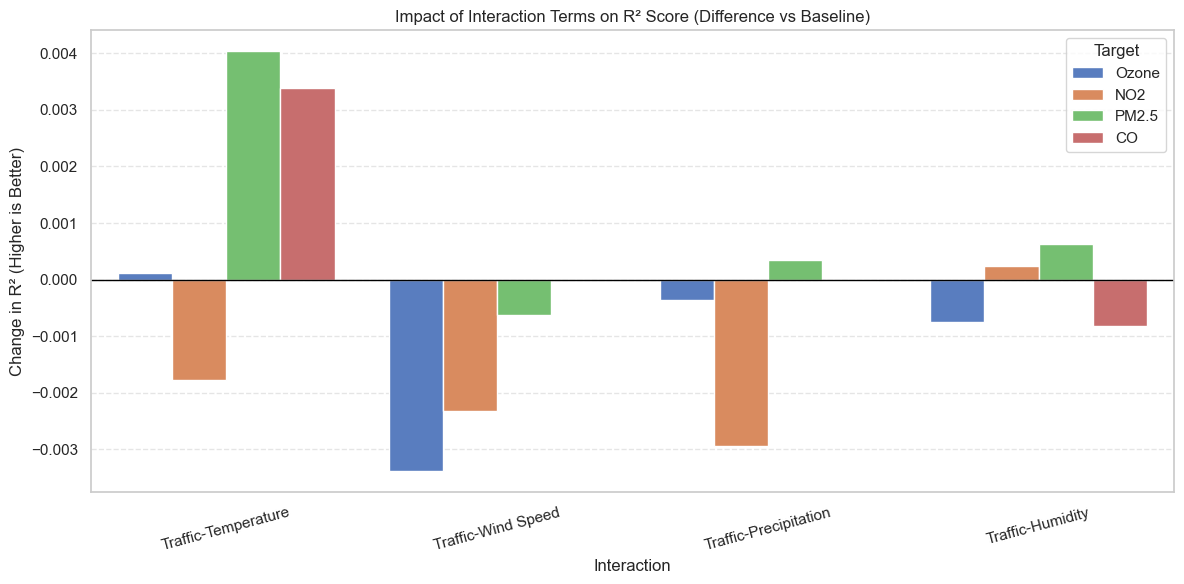

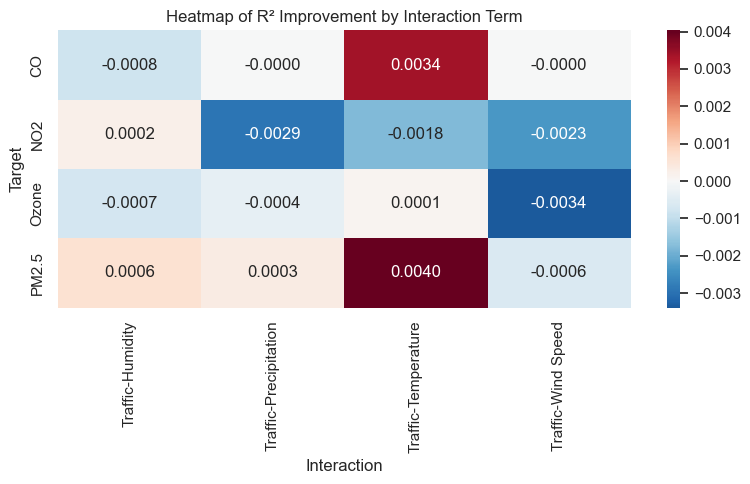

In [ ]:
# Load Results
df = pd.read_csv("results/mlr/mlr_final_test_metrics_no_confounders.csv")

# 1. Calculate Deltas (Improvement over "none")
results_list = []
targets = df['target'].unique()
interactions = [i for i in df['interaction'].unique() if i != 'none']

for t in targets:
    # Get baseline for this target
    base_row = df[(df['target'] == t) & (df['interaction'] == 'none')]
    if base_row.empty: continue

    base_r2 = base_row['test_r2'].values[0]
    base_rmse = base_row['test_rmse'].values[0]

    for i in interactions:
        row = df[(df['target'] == t) & (df['interaction'] == i)]
        if row.empty: continue

        curr_r2 = row['test_r2'].values[0]
        curr_rmse = row['test_rmse'].values[0]

        results_list.append({
            'Target': t,
            'Interaction': i,
            'Delta_R2': curr_r2 - base_r2,
            'Delta_RMSE': curr_rmse - base_rmse,
            'Pct_Change_RMSE': ((curr_rmse - base_rmse) / base_rmse) * 100
        })

df_deltas = pd.DataFrame(results_list)
label_map = {
    "int_traffic_temp": "Traffic-Temperature",
    "int_traffic_wind": "Traffic-Wind Speed",
    "int_traffic_precip": "Traffic-Precipitation",
    "int_traffic_humidity": "Traffic-Humidity"
}

df_deltas['Interaction'] = df_deltas['Interaction'].replace(label_map)

# 2. Plot R2 Differences
plt.figure(figsize=(12, 6))
sns.barplot(data=df_deltas, x='Interaction', y='Delta_R2', hue='Target', palette='muted')
plt.axhline(0, color='black', linewidth=1)
plt.title("Impact of Interaction Terms on R² Score (Difference vs Baseline)")
plt.ylabel("Change in R² (Higher is Better)")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. Heatmap of R2 Improvement
pivot_r2 = df_deltas.pivot(index='Target', columns='Interaction', values='Delta_R2')
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_r2, annot=True, cmap='RdBu_r', center=0, fmt=".4f")
plt.title("Heatmap of R² Improvement by Interaction Term")
plt.tight_layout()
plt.show()

In [32]:
df_deltas

,Target,Interaction,Delta_R2,Delta_RMSE,Pct_Change_RMSE
0,Ozone,Traffic-Temperature,0.000112,-0.000005,-0.005905
1,Ozone,Traffic-Wind Speed,-0.003387,0.000162,0.178761
2,Ozone,Traffic-Precipitation,-0.000368,0.000018,0.019457
3,Ozone,Traffic-Humidity,-0.000750,0.000036,0.039666
4,NO2,Traffic-Temperature,-0.001777,0.001887,0.059349
5,NO2,Traffic-Wind Speed,-0.002324,0.002467,0.077611
6,NO2,Traffic-Precipitation,-0.002940,0.003120,0.098153
7,NO2,Traffic-Humidity,0.000244,-0.000259,-0.008156
8,PM2.5,Traffic-Temperature,0.004030,-0.003568,-0.098636
9,PM2.5,Traffic-Wind Speed,-0.000624,0.000551,0.015243


# RMSE

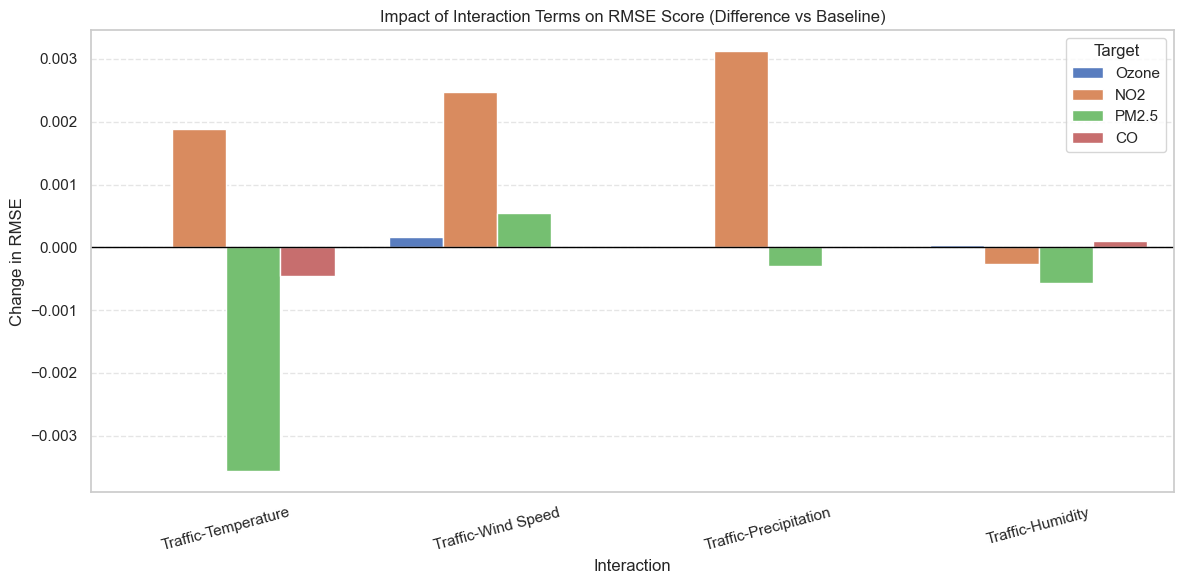

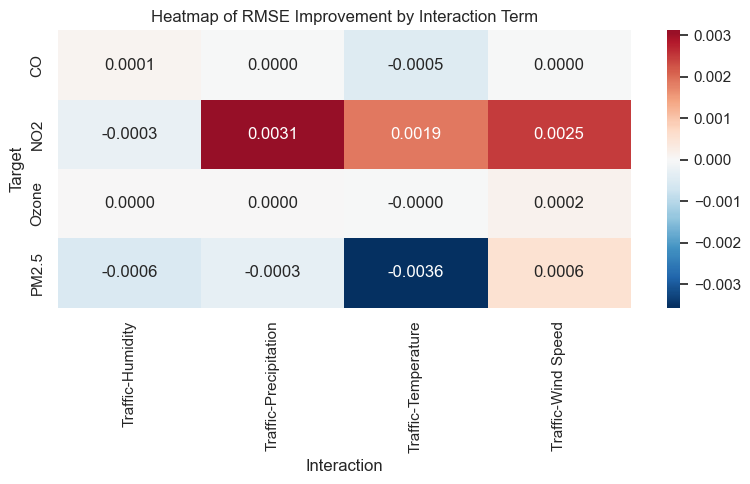

In [33]:
# 2. Plot RMSE Differences
plt.figure(figsize=(12, 6))
sns.barplot(data=df_deltas, x='Interaction', y='Delta_RMSE', hue='Target', palette='muted')
plt.axhline(0, color='black', linewidth=1)
plt.title("Impact of Interaction Terms on RMSE Score (Difference vs Baseline)")
plt.ylabel("Change in RMSE")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. Heatmap of RMSE Improvement
pivot_r2 = df_deltas.pivot(index='Target', columns='Interaction', values='Delta_RMSE')
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_r2, annot=True, cmap='RdBu_r', center=0, fmt=".4f")
plt.title("Heatmap of RMSE Improvement by Interaction Term")
plt.tight_layout()
plt.show()

## Run the model with confounders

In [ ]:
final_results = []

confounder_features = ["season_spring", "season_summer", "season_fall", "is_weekend", "is_covid"]
base_features_with_conf = base_features_no_conf + confounder_features

trained_models = {}

for target, interaction in product(pollutant_targets, interaction_features):
    if interaction == "none":
        feat_list = base_features_with_conf
    else:
        feat_list = base_features_with_conf + [interaction]

    X_train = train[feat_list]
    y_train = train[target]
    X_test  = test[feat_list]
    y_test  = test[target]

    print(f"Training multi linear regression model for {target} with interaction: {interaction}")

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    final_results.append({
        "target": target,
        "interaction": interaction,
        "features_used": ",".join(feat_list),
        "test_rmse": rmse,
        "test_mae": mae,
        "test_r2": r2,
        "test_mape": mape
    })

    trained_models[(target, interaction)] = {
        "model": model,
        "X_test": X_test,
        "y_test": y_test,
        "y_pred": y_pred,
        "features": feat_list,
    }

final_results_df = pd.DataFrame(final_results)
final_results_df.to_csv(
    "results/mlr/mlr_final_test_metrics_with_confounders.csv",
    index=False,
)
final_results_df

Training multi linear regression model for Ozone with interaction: int_traffic_temp
Training multi linear regression model for Ozone with interaction: int_traffic_wind
Training multi linear regression model for Ozone with interaction: int_traffic_precip
Training multi linear regression model for Ozone with interaction: int_traffic_humidity
Training multi linear regression model for Ozone with interaction: none
Training multi linear regression model for NO2 with interaction: int_traffic_temp
Training multi linear regression model for NO2 with interaction: int_traffic_wind
Training multi linear regression model for NO2 with interaction: int_traffic_precip
Training multi linear regression model for NO2 with interaction: int_traffic_humidity
Training multi linear regression model for NO2 with interaction: none
Training multi linear regression model for PM2.5 with interaction: int_traffic_temp
Training multi linear regression model for PM2.5 with interaction: int_traffic_wind
Training multi

,target,interaction,features_used,test_rmse,test_mae,test_r2,test_mape
0,Ozone,int_traffic_temp,"traffic_daily_total,temperature_2m_max,wind_sp...",0.088754,0.006087,0.569412,0.161998
1,Ozone,int_traffic_wind,"traffic_daily_total,temperature_2m_max,wind_sp...",0.088935,0.006113,0.565891,0.162481
2,Ozone,int_traffic_precip,"traffic_daily_total,temperature_2m_max,wind_sp...",0.088761,0.006086,0.569281,0.162030
3,Ozone,int_traffic_humidity,"traffic_daily_total,temperature_2m_max,wind_sp...",0.088764,0.006087,0.569218,0.162033
4,Ozone,none,"traffic_daily_total,temperature_2m_max,wind_sp...",0.088742,0.006086,0.569648,0.161991
5,NO2,int_traffic_temp,"traffic_daily_total,temperature_2m_max,wind_sp...",3.096312,7.473325,0.327099,0.264981
6,NO2,int_traffic_wind,"traffic_daily_total,temperature_2m_max,wind_sp...",3.100933,7.525838,0.323073,0.267041
7,NO2,int_traffic_precip,"traffic_daily_total,temperature_2m_max,wind_sp...",3.103003,7.549166,0.321264,0.268227
8,NO2,int_traffic_humidity,"traffic_daily_total,temperature_2m_max,wind_sp...",3.100109,7.524935,0.323792,0.266567
9,NO2,none,"traffic_daily_total,temperature_2m_max,wind_sp...",3.100310,7.525185,0.323616,0.266608


## Feature Importance

In [35]:
experiment_name = "with_confounders"

save_base_dir = os.path.join("results", "mlr", "feature_importance_plots", experiment_name)
os.makedirs(save_base_dir, exist_ok=True)

In [36]:
for (target, interaction), data in trained_models.items():
    
    # 1. Retrieve pre-calculated data and model
    model = data["model"]
    X_train = train[data["features"]] # We need X_train for the SHAP explainer background
    X_test = data["X_test"]
    
    # 2. Create Target Directory
    target_dir = os.path.join(save_base_dir, target)
    os.makedirs(target_dir, exist_ok=True)
    
    # 3. Calculate SHAP values
    # We use a subsample of X_train for the background to speed up calculation if data is large
    # For Linear models, we can often use the whole X_train or a summary
    explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
    shap_values = explainer.shap_values(X_test)
    
    # 4. Generate Plot
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importance: {target} ({interaction}) - Existing Model")
    
    # Create the bar plot (global importance)
    shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
    
    # 5. Save
    plot_path = os.path.join(target_dir, f"{interaction}.png")
    plt.tight_layout()
    plt.savefig(plot_path)
    plt.close()

print(f"Plots saved to {save_base_dir}")

c:\Users\User1\anaconda3\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)
c:\Users\User1\anaconda3\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)
c:\Users\User1\anaconda3\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)
c:\Users\User1\anaconda3\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropri

Plots saved to results\mlr\feature_importance_plots\with_confounders


**Plot Differences in R2**

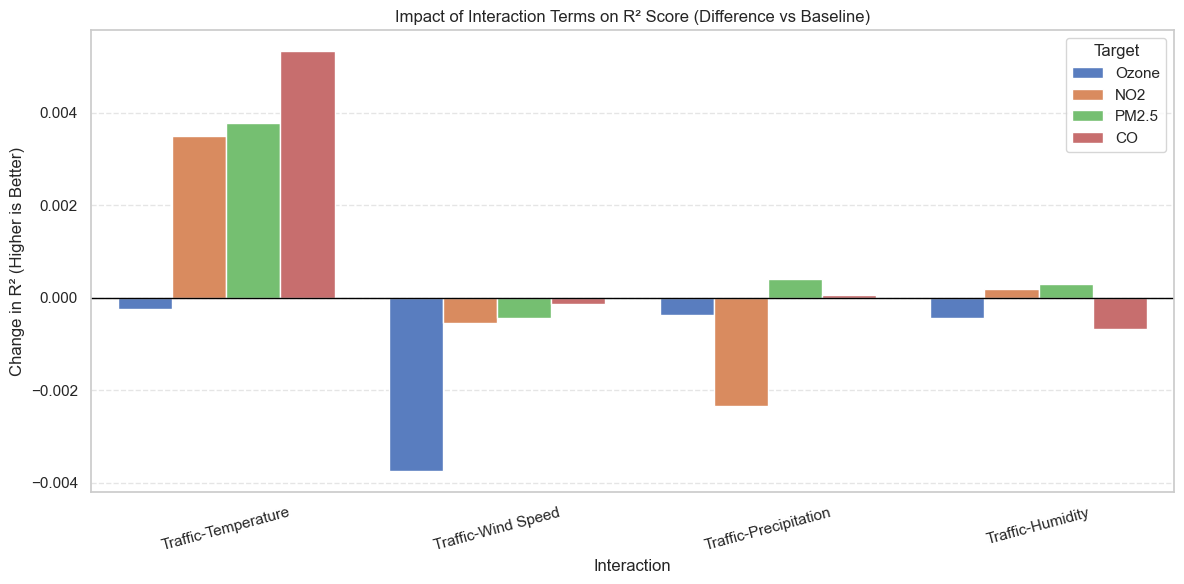

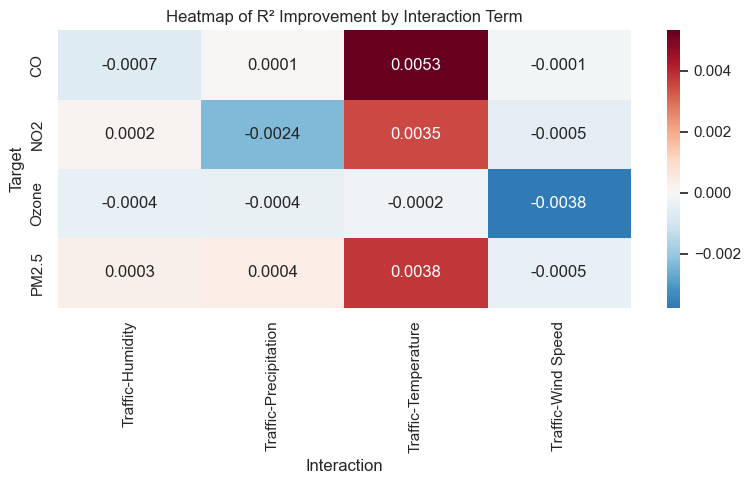

In [ ]:
# Load Results
df = pd.read_csv("results/mlr/mlr_final_test_metrics_with_confounders.csv")

# 1. Calculate Deltas (Improvement over "none")
results_list = []
targets = df['target'].unique()
interactions = [i for i in df['interaction'].unique() if i != 'none']

for t in targets:
    # Get baseline for this target
    base_row = df[(df['target'] == t) & (df['interaction'] == 'none')]
    if base_row.empty: continue

    base_r2 = base_row['test_r2'].values[0]
    base_rmse = base_row['test_rmse'].values[0]

    for i in interactions:
        row = df[(df['target'] == t) & (df['interaction'] == i)]
        if row.empty: continue

        curr_r2 = row['test_r2'].values[0]
        curr_rmse = row['test_rmse'].values[0]

        results_list.append({
            'Target': t,
            'Interaction': i,
            'Delta_R2': curr_r2 - base_r2,
            'Delta_RMSE': curr_rmse - base_rmse,
            'Pct_Change_RMSE': ((curr_rmse - base_rmse) / base_rmse) * 100
        })

df_deltas = pd.DataFrame(results_list)
label_map = {
    "int_traffic_temp": "Traffic-Temperature",
    "int_traffic_wind": "Traffic-Wind Speed",
    "int_traffic_precip": "Traffic-Precipitation",
    "int_traffic_humidity": "Traffic-Humidity"
}

df_deltas['Interaction'] = df_deltas['Interaction'].replace(label_map)

# 2. Plot R2 Differences
plt.figure(figsize=(12, 6))
sns.barplot(data=df_deltas, x='Interaction', y='Delta_R2', hue='Target', palette='muted')
plt.axhline(0, color='black', linewidth=1)
plt.title("Impact of Interaction Terms on R² Score (Difference vs Baseline)")
plt.ylabel("Change in R² (Higher is Better)")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. Heatmap of R2 Improvement
pivot_r2 = df_deltas.pivot(index='Target', columns='Interaction', values='Delta_R2')
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_r2, annot=True, cmap='RdBu_r', center=0, fmt=".4f")
plt.title("Heatmap of R² Improvement by Interaction Term")
plt.tight_layout()
plt.show()

### RMSE

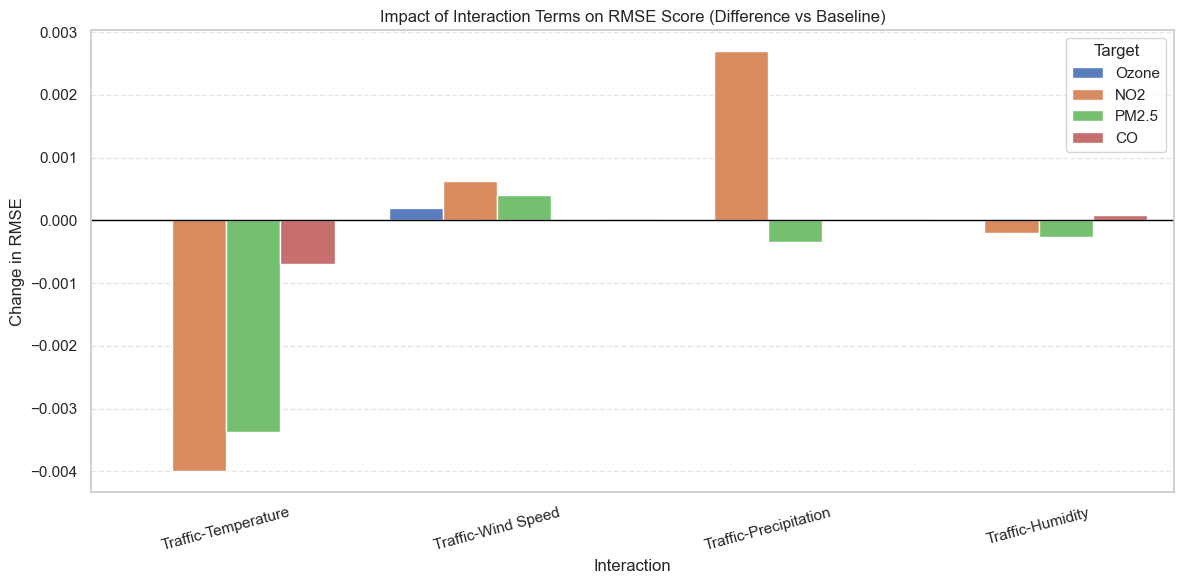

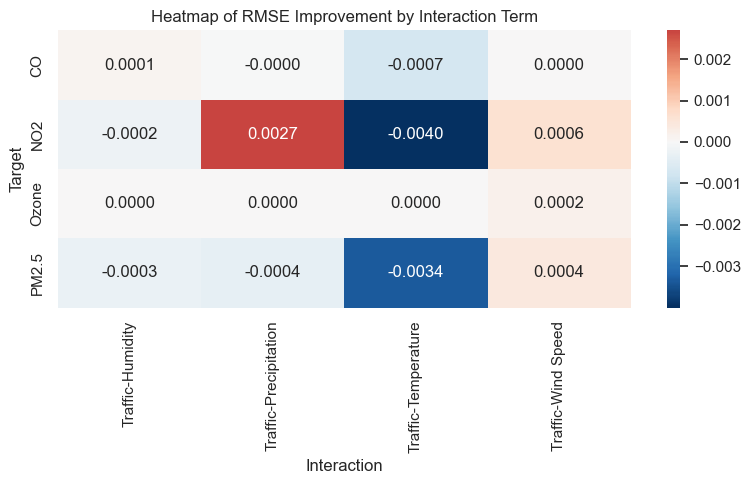

In [38]:
# 2. Plot RMSE Differences
plt.figure(figsize=(12, 6))
sns.barplot(data=df_deltas, x='Interaction', y='Delta_RMSE', hue='Target', palette='muted')
plt.axhline(0, color='black', linewidth=1)
plt.title("Impact of Interaction Terms on RMSE Score (Difference vs Baseline)")
plt.ylabel("Change in RMSE")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. Heatmap of RMSE Improvement
pivot_r2 = df_deltas.pivot(index='Target', columns='Interaction', values='Delta_RMSE')
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_r2, annot=True, cmap='RdBu_r', center=0, fmt=".4f")
plt.title("Heatmap of RMSE Improvement by Interaction Term")
plt.tight_layout()
plt.show()

## Comparison With and Without Confounders Control

In [39]:
no_conf = pd.read_csv('./mlr_final_test_metrics_no_confounders.csv')
with_conf = pd.read_csv('./mlr_final_test_metrics_with_confounders.csv')

In [40]:
# Add suffixes so columns stay distinct after merge
cmp_df = no_conf.merge(
    with_conf,
    on=["target", "interaction"],
    suffixes=("_no_conf", "_with_conf")
)

# Compute deltas (with confounders minus without)
cmp_df["delta_rmse_conf"] = cmp_df["test_rmse_with_conf"] - cmp_df["test_rmse_no_conf"]
cmp_df["delta_r2_conf"]   = cmp_df["test_r2_with_conf"]   - cmp_df["test_r2_no_conf"]
cmp_df["delta_mae_conf"]  = cmp_df["test_mae_with_conf"]  - cmp_df["test_mae_no_conf"]

# Negative delta_rmse_conf => adding confounders improved RMSE
cmp_df[[
    "target", "interaction",
    "test_rmse_no_conf", "test_rmse_with_conf", "delta_rmse_conf",
    "test_r2_no_conf",   "test_r2_with_conf",   "delta_r2_conf"
]]
# 1) Effect of interactions without confounders
no_conf["has_interaction"] = no_conf["interaction"] != "none"
agg_no = (
    no_conf.groupby(["target", "has_interaction"], as_index=False)
           .agg(best_rmse=("test_rmse", "min"))
)

# 2) Effect of interactions with confounders
with_conf["has_interaction"] = with_conf["interaction"] != "none"
agg_with = (
    with_conf.groupby(["target", "has_interaction"], as_index=False)
             .agg(best_rmse=("test_rmse", "min"))
)

# Pivot so you can read off improvement for each setting
pivot_no   = agg_no.pivot(index="target", columns="has_interaction", values="best_rmse")
pivot_with = agg_with.pivot(index="target", columns="has_interaction", values="best_rmse")
pivot_no.columns   = ["rmse_no_int_no_conf",   "rmse_with_int_no_conf"]
pivot_with.columns = ["rmse_no_int_with_conf", "rmse_with_int_with_conf"]

comparison = pivot_no.join(pivot_with)
comparison["delta_int_no_conf"]   = comparison["rmse_with_int_no_conf"]   - comparison["rmse_no_int_no_conf"]
comparison["delta_int_with_conf"] = comparison["rmse_with_int_with_conf"] - comparison["rmse_no_int_with_conf"]
print(comparison)


        rmse_no_int_no_conf  rmse_with_int_no_conf  rmse_no_int_with_conf  \
target                                                                      
CO                 0.424723               0.424272               0.427669   
NO2                3.179147               3.178887               3.100310   
Ozone              0.090833               0.090828               0.088742   
PM2.5              3.617520               3.613951               3.607514   

        rmse_with_int_with_conf  delta_int_no_conf  delta_int_with_conf  
target                                                                   
CO                     0.426975          -0.000451            -0.000694  
NO2                    3.096312          -0.000259            -0.003999  
Ozone                  0.088754          -0.000005             0.000012  
PM2.5                  3.604149          -0.003568            -0.003366  


In [41]:
# 1) Effect of interactions on R² without confounders
agg_no_r2 = (
    no_conf.groupby(["target", "has_interaction"], as_index=False)
           .agg(best_r2=("test_r2", "max"))
)

# 2) Effect of interactions on R² with confounders
agg_with_r2 = (
    with_conf.groupby(["target", "has_interaction"], as_index=False)
             .agg(best_r2=("test_r2", "max"))
)

pivot_no_r2 = agg_no_r2.pivot(index="target", columns="has_interaction", values="best_r2")
pivot_with_r2 = agg_with_r2.pivot(index="target", columns="has_interaction", values="best_r2")

pivot_no_r2.columns   = ["r2_no_int_no_conf",   "r2_with_int_no_conf"]
pivot_with_r2.columns = ["r2_no_int_with_conf", "r2_with_int_with_conf"]

comparison_r2 = pivot_no_r2.join(pivot_with_r2)
comparison_r2["delta_int_no_conf"]   = comparison_r2["r2_with_int_no_conf"]   - comparison_r2["r2_no_int_no_conf"]
comparison_r2["delta_int_with_conf"] = comparison_r2["r2_with_int_with_conf"] - comparison_r2["r2_no_int_with_conf"]


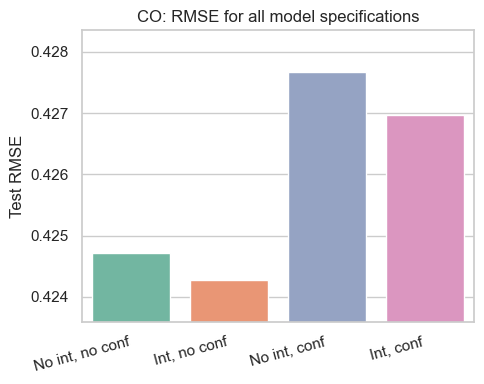

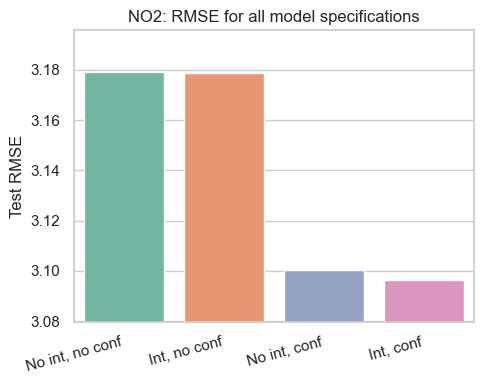

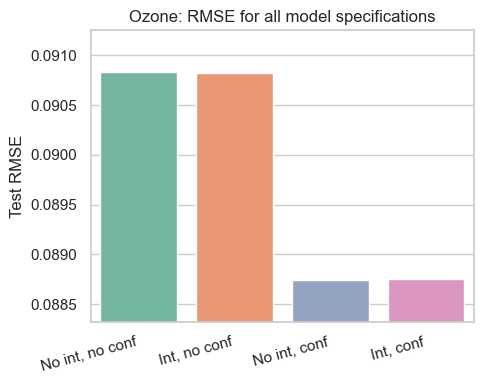

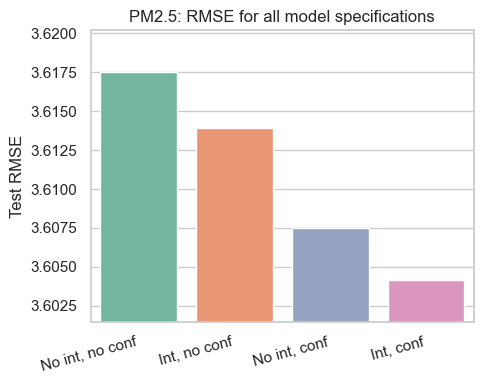

In [42]:
import seaborn as sns
sns.set(style="whitegrid")

# For each target: interactions effect with vs without confounders

targets = comparison.index.tolist()

for t in targets:
    row = comparison.loc[t]

    rmse_values = [
        row["rmse_no_int_no_conf"],
        row["rmse_with_int_no_conf"],
        row["rmse_no_int_with_conf"],
        row["rmse_with_int_with_conf"],
    ]
    labels = [
        "No int, no conf",
        "Int, no conf",
        "No int, conf",
        "Int, conf",
    ]

    plot_df = pd.DataFrame({"label": labels, "rmse": rmse_values})

    plt.figure(figsize=(5, 4))
    ax = sns.barplot(
        data=plot_df,
        x="label",
        y="rmse",
        hue="label",      # use x also as hue
        palette="Set2",
        legend=False      # avoid duplicate legend
    )
    ymin = min(rmse_values)
    ymax = max(rmse_values)
    margin = (ymax - ymin) * 0.2  # 20% padding
    if margin == 0:               # all values identical
        margin = ymax * 0.05
    ax.set_ylim(ymin - margin, ymax + margin)

    ax.set_ylabel("Test RMSE")
    ax.set_xlabel("")
    ax.set_title(f"{t}: RMSE for all model specifications")
    plt.xticks(rotation=15, ha="right")
    plt.tight_layout()
    plt.show()




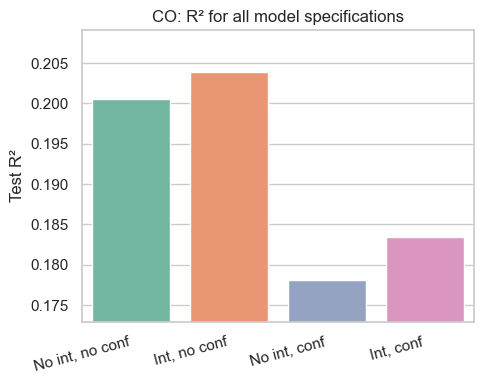

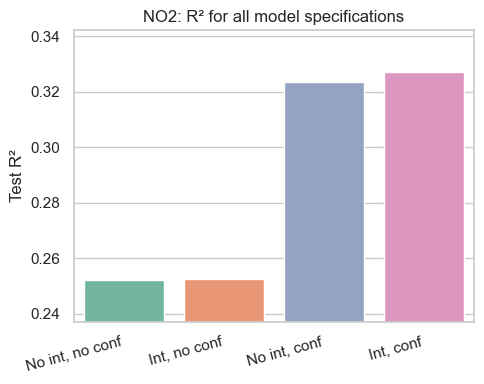

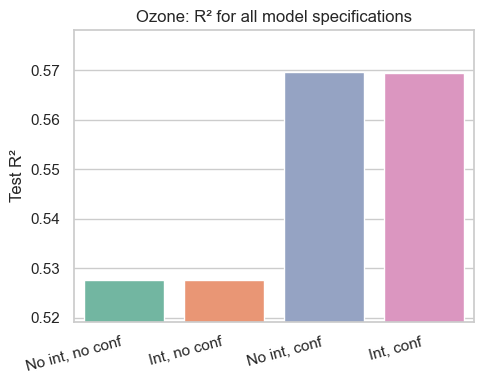

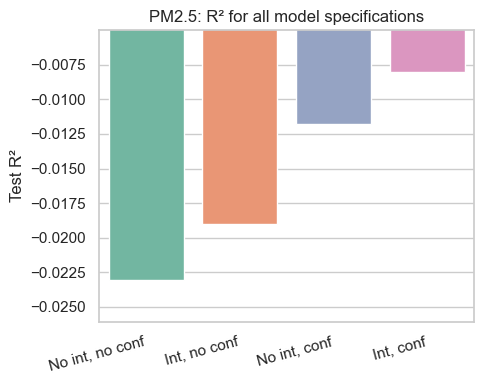

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

targets = comparison_r2.index.tolist()

for t in targets:
    row = comparison_r2.loc[t]

    r2_values = [
        row["r2_no_int_no_conf"],
        row["r2_with_int_no_conf"],
        row["r2_no_int_with_conf"],
        row["r2_with_int_with_conf"],
    ]
    labels = [
        "No int, no conf",
        "Int, no conf",
        "No int, conf",
        "Int, conf",
    ]

    plot_df = pd.DataFrame({"label": labels, "r2": r2_values})

    plt.figure(figsize=(5, 4))
    ax = sns.barplot(
        data=plot_df,
        x="label",
        y="r2",
        hue="label",
        palette="Set2",
        legend=False,
    )

    # Zoom y-axis around this target's R² values
    ymin = min(r2_values)
    ymax = max(r2_values)
    margin = (ymax - ymin) * 0.2
    if margin == 0:
        margin = 0.05
    ax.set_ylim(ymin - margin, ymax + margin)

    ax.set_ylabel("Test R²")
    ax.set_xlabel("")
    ax.set_title(f"{t}: R² for all model specifications")
    plt.xticks(rotation=15, ha="right")
    plt.tight_layout()
    plt.show()
